# Exploring grain settling

Grain settling is one of the most important problems in sedimentology (and therefore sedimentary geology), as neither sediment transport nor deposition can be understood and modeled without knowing what is the **settling velocity** of a particle of a certain grain size. 

Using **Python** we will explore the condition of validity and differences between 3 settling velocity laws:

1. Stokes's Law
2. Turbulent Law
3. Ferguson & Church Law


<div class="alert alert-block alert-info">
Writing some simple Python codes and plotting settling velocity against grain size will help you to better understand these relationships through exploring them graphically. Then we will look at the advantages of using nondimensionally based curves instead of dimensional ones.
</div>

***

**Content:**
- [Settling laws](#laws)
- [Implementation in Python](#pylaws)
- [Dimensionless diagram](#dimensionless)

***

## <a name="laws"></a>  Settling laws

### Stokes' Law

<blockquote>Very **small grains**, when submerged in water, have a mass small enough that they reach a settling velocity before any turbulence develops. This is true for **clay- and silt-sized** particles settling in water, and for these grain size classes **Stokes' Law** can be used to calculate the settling velocity:

$$ w=\frac{RgD^2}{C_1\nu}$$

where $R$=specific submerged gravity, $g$=gravitational acceleration, $D$ is the particle diameter, $C_1$ is a constant with a theoretical value of $18$, and $\nu$ is the kinematic viscosity.</blockquote>

For grain sizes coarser than silt, a category that clearly includes a lot of sediment and rock types of great interest for coastal applications, things get more complicated. The reason for this is the development of a separation wake behind the falling grain; the appearance of this wake results in turbulence and large pressure differences between the front and back of the particle. 

### Turbulent Law

<blockquote>For large grains - **pebbles, cobbles** - this effect is so strong that viscous forces become insignificant and turbulent drag dominates; the settling velocity can be estimated using the empirical equation:

$$w=\sqrt{\frac{4RgD}{3C_2} }$$
</blockquote>


For the grain size in between such as **sand**, grains are small enough that viscous forces still play an important role in their subaqueous settling behavior, but large enough that the departure from Stokes' Law is significant and wake turbulence cannot be ignored. 

### Ferguson & Church Law

<blockquote>There are several empirical - and fairly complicated - equations that try to bridge this gap; here we focus on the simplest one, published by 
<a href='http://dx.doi.org/10.1306/051204740933'>Ferguson & Church (2004)</a> which states:

$$ w=\frac{RgD^2}{C_1\nu+\sqrt{0.75C_2RgD^3}}$$

At small values of $D$, the left term in the denominator is much larger than the one containing the third power of $D$, and the equation is equivalent of Stokes' Law. At large values of $D$, the second term dominates and the settling velocity converges to the solution of the turbulent drag equation.
</blockquote>

## <a name="pylaws"></a>  Implementation in Python

In [7]:
from math import pi
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg' 

# Density of particle in kg/m3
rop = 2650.0 
# Density of fluid in kg/m3
rof = 1000.0 
# Dynamic viscosity in Pa*s (N*s/m^2)
visc = 1.002*1E-3 #8.9*1E-4 
# Constant in Ferguson-Church equation and Stokes
C1 = 18 
# Constant in Ferguson-Church equation, valid for natural sand grains and turbulent law
C2 = 1 

Declaration of the python functions for each settling velocity formulation.

In [2]:
def v_stokes(rop,rof,d,visc,C1):
        R = (rop-rof)/rof # submerged specific gravity
        w = R*9.81*(d**2)/(C1*visc/rof)
        return w

def v_turbulent(rop,rof,d,visc,C2):
        R = (rop-rof)/rof 
        w = (4*R*9.81*d/(3*C2))**0.5
        return w
    
def v_ferg(rop,rof,d,visc,C1,C2):
        R = (rop-rof)/rof
        w = (R*9.81*d**2)/(C1*visc/rof+(0.75*C2*R*9.91*d**3)**0.5)
        return w

### Laws performance  for sand sediment classes

Now we plot these equations for a range of particle diameters.


To illustrate how the curves fits to measured particle settling velocities, we also plot the data from settling experiments performed with natural river sands (Table 2 in <a href='http://dx.doi.org/10.1306/051204740933'>Ferguson & Church (2004)</a>).


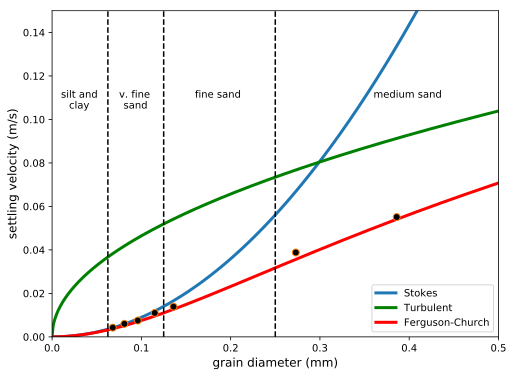

In [10]:
# Define evenly spaced grain diameter between 0 and 0.5 mm at a step of 0.000001 m.
d = np.arange(0,0.0005,0.000001)

# Settling velocity Stokes
ws = v_stokes(rop,rof,d,visc,C1)

# Settling velocity Turbuent
wt = v_turbulent(rop,rof,d,visc,C2)

# Settling velocity Fergusson Church
wf = v_ferg(rop,rof,d,visc,C1,C2)

# Set figure parameter
plt.figure(figsize=(8,6))

# Plot settling velocities
plt.plot(d*1000,ws,label='Stokes',linewidth=3)
plt.plot(d*1000,wt,'g',label='Turbulent',linewidth=3)
plt.plot(d*1000,wf,'r',label='Ferguson-Church',linewidth=3)

# Plot vertical dot lines between sediment classes
# define the line like this [x1,x2],[y1,y2]
plt.plot([0.25, 0.25],[0, 0.15],'k--')
plt.plot([0.25/2.0, 0.25/2.0],[0, 0.15],'k--')
plt.plot([0.25/4.0, 0.25/4.0],[0, 0.15],'k--')

# Plot sediment class types
plt.text(0.36, 0.11, 'medium sand', fontsize=10)
plt.text(0.16, 0.11, 'fine sand', fontsize=10)
plt.text(0.075, 0.11, 'v. fine', fontsize=10)
plt.text(0.08, 0.105, 'sand', fontsize=10)
plt.text(0.01, 0.11, 'silt and', fontsize=10)
plt.text(0.019, 0.105, 'clay', fontsize=10)

# Show the legend and axis
plt.legend(loc=4, fontsize=10)
plt.xlabel('grain diameter (mm)',fontsize=12)
plt.ylabel('settling velocity (m/s)',fontsize=12)
plt.axis([0,0.5,0,0.15]);

# Data from settling experiments performed with natural river sands 
# Diameters in mm
D = [0.068, 0.081, 0.096, 0.115, 0.136, 0.273, 0.386, 0.55, 0.77, 1.09, 2.18, 4.36]
# Measured velocities in m/s
w = [0.00425, 0.0060, 0.0075, 0.0110, 0.0139, 0.0388, 0.0551, 0.0729, 0.0930, 0.141, 0.209, 0.307]

# Plot measured data
plt.plot(D,w,'o',markerfacecolor=[0.0, 0.0, 0.0], markersize=7)
plt.show()
plt.close()

**It is obvious that the departure from Stokes' Law is already significant for very fine sand and Stokes settling is completely inadequate for describing the settling of medium sand.**

### Laws performance for coarser sediment size

The plot above only captures particle sizes finer than medium sand; let's see what happens as we move to coarser sediment.

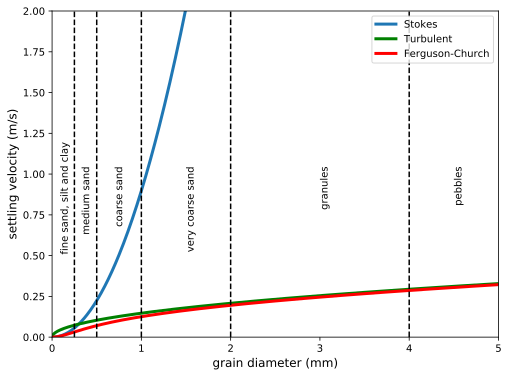

In [14]:
# Define evenly spaced grain diameter between 0 and 1cm at a step of 0.00001 m.
d = np.arange(0,0.01,0.00001)

# Settling velocity Stokes
ws = v_stokes(rop,rof,d,visc,C1)
# Settling velocity Turbuent
wt = v_turbulent(rop,rof,d,visc,C2)
# Settling velocity Fergusson Church
wf = v_ferg(rop,rof,d,visc,C1,C2)

# Set figure parameter
plt.figure(figsize=(8,6))

# Plot settling velocities
plt.plot(d*1000,ws,label='Stokes',linewidth=3)
plt.plot(d*1000,wt,'g',label='Turbulent',linewidth=3)
plt.plot(d*1000,wf,'r',label='Ferguson-Church',linewidth=3)

# Plot vertical dot lines between sediment classes
# define the line like this [x1,x2],[y1,y2]
plt.plot([0.25, 0.25],[0, 2],'k--')
plt.plot([0.5, 0.5],[0, 2],'k--')
plt.plot([1, 1],[0, 2],'k--')
plt.plot([2, 2],[0, 2],'k--')
plt.plot([4, 4],[0, 2],'k--')

# Plot sediment class types
plt.text(0.33, 1.0, 'medium sand', fontsize=10, rotation='vertical')
plt.text(0.09, 1.15, 'fine sand, silt and clay', fontsize=10, rotation='vertical')
plt.text(0.7, 1.0, 'coarse sand', fontsize=10, rotation='vertical')
plt.text(1.5, 1.0, 'very coarse sand', fontsize=10, rotation='vertical')
plt.text(3, 1.0, 'granules', fontsize=10, rotation='vertical')
plt.text(4.5, 1.0, 'pebbles', fontsize=10, rotation='vertical')

# Show the legend and axis
plt.legend(loc=1, fontsize=10)
plt.xlabel('grain diameter (mm)',fontsize=12)
plt.ylabel('settling velocity (m/s)',fontsize=12)
plt.axis([0,5,0,2])
plt.show()
plt.close()

### Log plot

A log-log plot is much better for looking at a wide spectrum of grain sizes.

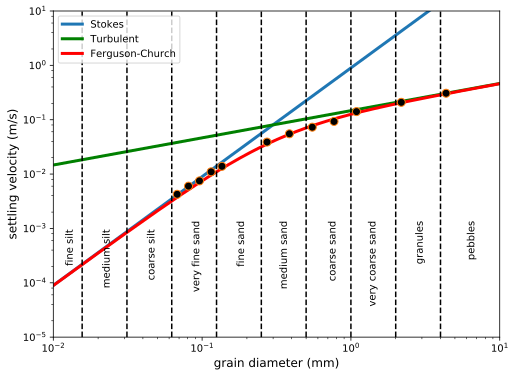

In [5]:
# Define evenly spaced grain diameter between 0 and 1cm at a step of 0.00001 m.
d = np.arange(0,0.01,0.00001)

# Settling velocity Stokes
ws = v_stokes(rop,rof,d,visc,C1)
# Settling velocity Turbuent
wt = v_turbulent(rop,rof,d,visc,C2)
# Settling velocity Fergusson Church
wf = v_ferg(rop,rof,d,visc,C1,C2)

# Set figure parameter
plt.figure(figsize=(8,6))

# Plot settling velocities using log scale: plt.loglog
plt.loglog(d*1000,ws,label='Stokes',linewidth=3)
plt.loglog(d*1000,wt,'g',label='Turbulent',linewidth=3)
plt.loglog(d*1000,wf,'r',label='Ferguson-Church',linewidth=3)

# Plot vertical dot lines between sediment classes
# define the line like this [x1,x2],[y1,y2]
plt.plot([1.0/64, 1.0/64],[0.00001, 10],'k--')
plt.plot([1.0/32, 1.0/32],[0.00001, 10],'k--')
plt.plot([1.0/16, 1.0/16],[0.00001, 10],'k--')
plt.plot([1.0/8, 1.0/8],[0.00001, 10],'k--')
plt.plot([0.25, 0.25],[0.00001, 10],'k--')
plt.plot([0.5, 0.5],[0.00001, 10],'k--')
plt.plot([1, 1],[0.00001, 10],'k--')
plt.plot([2, 2],[0.00001, 10],'k--')
plt.plot([4, 4],[0.00001, 10],'k--')

# Plot sediment class types
plt.text(0.012, 0.0007, 'fine silt', fontsize=10, rotation='vertical')
plt.text(0.17/8, 0.0007, 'medium silt', fontsize=10, rotation='vertical')
plt.text(0.17/4, 0.0007, 'coarse silt', fontsize=10, rotation='vertical')
plt.text(0.17/2, 0.001, 'very fine sand', fontsize=10, rotation='vertical')
plt.text(0.17, 0.001, 'fine sand', fontsize=10, rotation='vertical')
plt.text(0.33, 0.001, 'medium sand', fontsize=10, rotation='vertical')
plt.text(0.7, 0.001, 'coarse sand', fontsize=10, rotation='vertical')
plt.text(1.3, 0.001, 'very coarse sand', fontsize=10, rotation='vertical')
plt.text(2.7, 0.001, 'granules', fontsize=10, rotation='vertical')
plt.text(6, 0.001, 'pebbles', fontsize=10, rotation='vertical')

# Show the legend and axis
plt.legend(loc=2, fontsize=10)
plt.xlabel('grain diameter (mm)', fontsize=12)
plt.ylabel('settling velocity (m/s)', fontsize=12)
plt.axis([0,10,0,10]);

# Plot measured data
plt.plot(D,w,'o',markerfacecolor=[0.0, 0.0, 0.0], markersize=8)
plt.show()
plt.close()

This plot shows how neither Stokes' Law, nor the velocity based on turbulent drag are valid for calculating settling velocities of sand-size grains in water, whereas **the Ferguson-Church equation provides a good fit for natural river sand.**

## <a name="dimensionless"></a>  Dimensionless diagram

The analysis and plots above are all dimensional, that is, you can quickly check by looking at the plots what is the approximate settling velocity of very fine sand. That is great, but you would have to generate a new plot - and potentially do a new experiment - if you wanted to look at the behavior of particles in some other fluid than water. 

A more general treatment as we discussed in the lecture involves dimensionless variables. 

For grain settling, these variables are the **Reynolds number** (Re) and the **drag coefficient** (Cd). We will reproduce this plot, using settling velocities that come from the three equations above.

### Reynolds number

<blockquote>
At terminal settling velocity, the particle **Re** is defined as:

$$Re=\frac{\rho_f w d}{\mu}$$

where $\mu$ is the dynamic viscosity of the fluid (Pa·s or N·s/m² or kg/(m·s)). At the begining of this notebook we've defined the kinematic viscosity ($\nu = \mu / \rho$) (m²/s).
</blockquote>

### Drag coefficient

<blockquote>
**$C_d$** is essentially a dimensionless version of the drag force:

$$C_d=\frac{2F_d}{\rho_f w^2 A}=\frac{8 F_d}{\rho_f w^2 \pi d^2}$$

$d$ is the particle diameter, $A$ is the reference area,  for a sphere $A=\pi r^2$, (note this is not the surface area $=4\pi r^2$).

At terminal velocity, the gravitational force $F_g$ equals the drag force $F_d$. That is
$F_d=F_g$
and the gravitational force is given by the submerged weight of the grain:
$$F_g=(\rho_p-\rho_f)\frac{4}{3}\pi r^3 g=(\rho_p-\rho_f)\frac{4}{3}\pi \left(\frac{d}{2}\right)^3 g$$
where $\rho_p$ & $\rho_f$ are the density of particle and the fluid respectively in kg/m3, $r$ is the radius of the sphere representing the idealised particle.
</blockquote>

Using these relationships it is possible to generate the plot of **drag coefficient vs. Reynolds number**.

In [15]:
# Define evenly spaced grain diameter between 0.000001 and 0.3m at a step of 0.00001 m.
d = np.arange(0.000001,0.3,0.00001)

# Constant in Ferguson-Church equation, valid for natural sand grains and turbulent law
# this constant is 0.4 for spheres, 1 for natural grains
C2 = 0.4 

# Settling velocity Stokes
ws = v_stokes(rop,rof,d,visc,C1)
# Settling velocity Turbuent
wt = v_turbulent(rop,rof,d,visc,C2)
# Settling velocity Fergusson Church
wf = v_ferg(rop,rof,d,visc,C1,C2)

# Drag force = Gravitational force
Fd = (rop-rof)*4/3*pi*((d/2)**3)*9.81 

# Drag coefficient for Stokes
Cds = Fd/(rof*ws**2*pi*(d**2)/8) 
# Drag coefficient for Turbuent
Cdt = Fd/(rof*wt**2*pi*(d**2)/8)
# Drag coefficient for Fergusson Church
Cdf = Fd/(rof*wf**2*pi*(d**2)/8)

# Particle Reynolds number for Stokes
Res = rof*ws*d/visc 

# Particle Reynolds number for Turbuent
Ret = rof*wt*d/visc

# Particle Reynolds number for Fergusson Church
Ref = rof*wf*d/visc

### Plotting the adimensional graph

We first use experimental data points digitized from <a href='http://ocw.mit.edu/courses/earth-atmospheric-and-planetary-sciences/12-110-sedimentary-geology-spring-2007/index.htm'>John Southard textbook</a>. 

In [16]:
# Data digitized from Southard textbook, figure 2-2:
# Experimental particle Reynolds number
Re_exp = [0.04857,0.10055,0.12383,0.15332,0.25681,0.3343,0.62599,0.77049,0.94788,1.05956,
       1.62605,2.13654,2.55138,3.18268,4.46959,4.92143,8.02479,12.28672,14.97393,21.33792,
       28.3517,34.55246,57.57204,78.3929,96.88149,159.92596,227.64082,287.31738,375.98547,
       516.14355,607.03827,695.8316,861.51953,1147.26099,1194.43213,1513.70166,1939.70557,
       2511.91235,2461.13232,3106.32397,3845.99561,4974.59424,6471.96875,8135.45166,8910.81543,
       11949.91309,17118.62109,21620.08203,28407.60352,36064.10156,46949.58594,62746.32422,
       80926.54688,97655.00781,122041.875,157301.8125,206817.7188,266273,346423.5938,302216.5938,
       335862.5313,346202,391121.5938,460256.375,575194.4375,729407.625]

# Experimental drag coefficient
Cd_exp = [479.30811,247.18175,199.24072,170.60068,112.62481,80.21341,45.37168,39.89885,34.56996,
       28.01445,18.88166,13.80322,12.9089,11.41266,8.35254,7.08445,5.59686,3.92277,3.53845,
       2.75253,2.48307,1.99905,1.49187,1.27743,1.1592,0.89056,0.7368,0.75983,0.64756,0.56107,
       0.61246,0.5939,0.49308,0.39722,0.48327,0.46639,0.42725,0.37951,0.43157,0.43157,0.40364,
       0.3854,0.40577,0.41649,0.46173,0.41013,0.42295,0.43854,0.44086,0.4714,0.45225,0.47362,
       0.45682,0.49104,0.46639,0.42725,0.42725,0.40171,0.31214,0.32189,0.20053,0.16249,0.10658,
       0.09175,0.09417,0.10601]

Making the plot

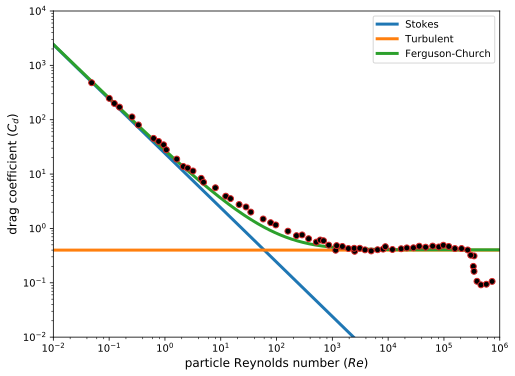

In [17]:
# Set figure parameter
plt.figure(figsize=(8,6))

# Plot drag coefficient vs particle Reynolds number using log scale: plt.loglog
plt.figure(figsize=(8,6))
plt.loglog(Res,Cds,linewidth=3, label='Stokes')
plt.loglog(Ret,Cdt,linewidth=3, label='Turbulent')
plt.loglog(Ref,Cdf,linewidth=3, label='Ferguson-Church')

# Plot digitized date from Southard
plt.loglog(Re_exp, Cd_exp, 'o', markerfacecolor = [0.0, 0.0, 0.0], markersize=6)

# Show the legend and axis
plt.legend(loc=1, fontsize=10)
plt.axis([1e-2,1e6,1e-2,1e4])
plt.xlabel('particle Reynolds number ($Re$)', fontsize=12)
plt.ylabel('drag coefficient ($C_d$)', fontsize=12)
plt.show()
plt.close()

As turbulence becomes dominant at larger Reynolds numbers, the drag coefficient converges to a constant value (which is equal to $C_2$). 

_Note however the departure of the experimental data from this ideal horizontal line: at high Reynolds numbers there is a sudden drop in drag coefficient as the laminar boundary layer becomes turbulent and the flow separation around the particle is delayed. _